## Finding Exoplanets using Fourier Transformations
Within this part we have two data sets, one is the normalized brightness of a star taken at irregular intervals and the other is the radial velocity of that same star measured regularly. 

In [115]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

doppler = pd.read_csv('data/Prob3_Doppler.csv')
transit = pd.read_csv('data/Prob3_Transit.csv')

We perform a fourier transformation on doppler data to find the period of the exoplanets. Both the star and its orbiting exoplanet orbit around the same point so both of their periods will be the same. We can see there are two periodic trends in the meaning there are likely two exoplanets(we got to be careful we don't know these periodic trends necessary mean there is a planet just that there likely is).

Text(0, 0.5, 'strength of signal')

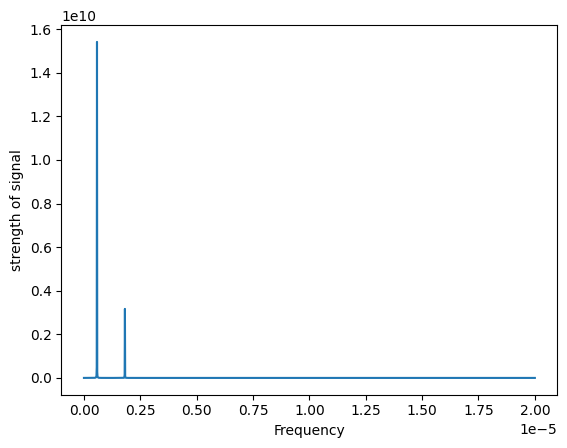

In [116]:
y=abs(np.fft.rfft(doppler['rad_vel']))**2
x=np.fft.rfftfreq(len(doppler['time_sec']),25000)
plt.plot(x,y)
plt.xlabel('Frequency')
plt.ylabel('strength of signal')

Now we convert the output from the fourier transformation from a period into a frequency. We do this by using the formula $P=\frac{1}{F}$ where $P$ is the period and $F$ is the frequency. We find the period of these two exoplanets are roughly 20 days and 6.36 days. 

In [117]:
periods = []
max_power_indices = []
for i in range(2):
    max_power_idx = np.argmax(y)
    dominant_frequency = x[max_power_idx]
    period = 1/dominant_frequency
    period = period
    periods.append(period)
    max_power_indices.append(max_power_idx)
    y[max_power_idx] = 0

print(periods)

[1728000.0, 550318.4713375797]


Next we calculate the "amplitude" of the planets orbits. I put amplitude in quotes because it represents the maximum individual contribution to the radial velocity of the star towards us. The star is actually always orbiting at this velocity, just at certain times it is coming straight at us or away from us so we see its full velocity. This create a sinusoidal pattern in the radial velocity data. 

In [118]:
temp_fft=abs(np.fft.rfft(doppler['rad_vel']))

velocities = []
for i in range(2):
    velocity=(1/len(doppler['rad_vel'])*2*temp_fft[max_power_indices[i]])
    velocities.append(velocity)
print(velocities)


[71.84789293681331, 32.56346790412283]


We now use the equation $M_2 = \left( \frac{\left( \text{total mass} \right)^2}{G} \left( \frac{V_1^3 \cdot T}{2\pi} \right) \right)^{1/3}
$ to find the mass of the orbiting planet. We find the mass of the first planet to be $3.9071 \times 10^{27}$ kg and the mass of the second planets to be $1.2092 \times 10^{27}$ kg. 

In [119]:
Gravity_constant=6.67408e-11
sun_mass=1.9885e30

planet_masses = []
for i in range(2):
    mass=(((sun_mass**2/Gravity_constant)*(((velocities[i]**3)*periods[i])/2*np.pi))**(1/3))
    planet_masses.append(mass)
print(planet_masses)

[3.907105774906571e+27, 1.2092847223368153e+27]


Because we know the period of the planets, we can 'fold' the data within the transit dataset by the period. This will allow us to better see the dip in brightness caused by the planet passing in front of the star. We see that the first planet causes a 0.5% dip in brightness and the second planet causes a 0.3% dip in brightness.

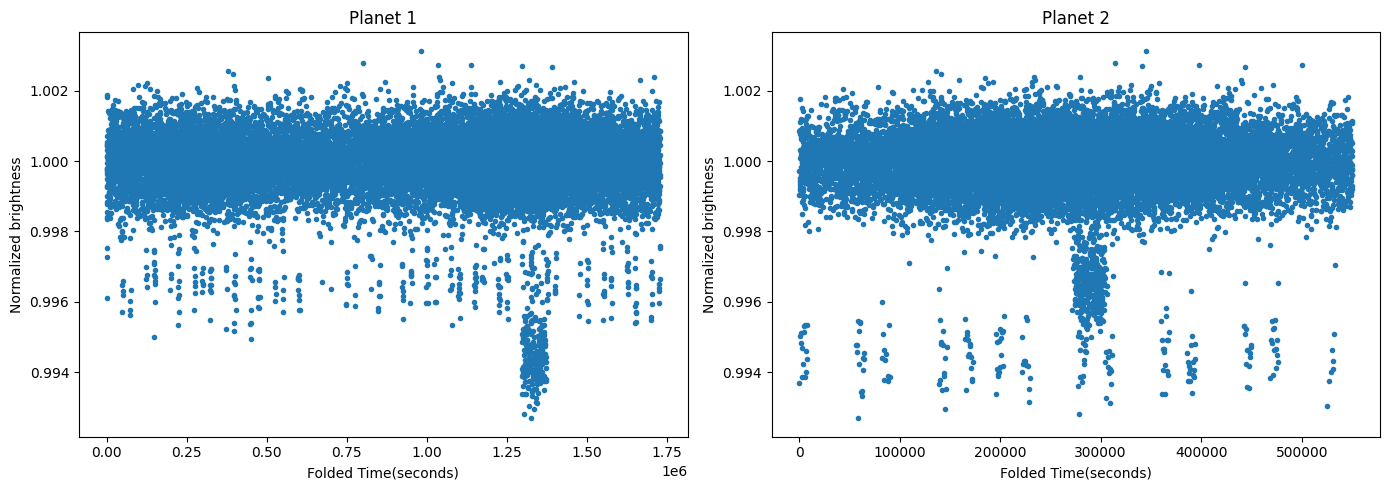

In [120]:
transit['folded'] = transit['time_sec']%periods[0]


fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(transit['folded'], transit['norm_bright'], '.')
axs[0].set_xlabel('Folded Time(seconds)')
axs[0].set_ylabel('Normalized brightness')
axs[0].set_title('Planet 1')

axs[1].plot(transit['time_sec'] % periods[1], transit['norm_bright'], '.')
axs[1].set_xlabel('Folded Time(seconds)')
axs[1].set_ylabel('Normalized brightness')
axs[1].set_title('Planet 2')
plt.tight_layout()
plt.show()

We now are going to use the formula $\%_{\text{light lost}}=(\frac{P_1}{P_2})^2$, where $P_1$ is the radius of the planet and $P_2$ is the radius of the sun. We rearrange this formula to find the radius of the planet below. We find that planet 1 has a radius of $491934$ km and planet 2 has a radius of $381051$ km.

In [121]:
p1_light_lost = 0.5
p2_light_lost = 0.3
sun_radius = 695700

planet1_radius = np.sqrt(p1_light_lost)*sun_radius
planet2_radius = np.sqrt(p2_light_lost)*sun_radius
print(planet1_radius, planet2_radius)

491934.18767148117 381050.583256344


Now that we have the mass of the planets and the radius of the planets we can use the equation $\frac{{4}}{{3}} \pi r^3$ to find the volume of the planet. Next we can find the density of the planet using the equation $\frac{{\text{mass}}}{{\text{volume}}}$, which will help us identify what type of planet it is. This tells us they are extremely dense planets that orbit incredibly fast likely due to their close proximity to the star. 

In [124]:
#find the volume of the planet
planet1_volume = (4/3)*np.pi*(planet1_radius**3)
planet2_volume = (4/3)*np.pi*(planet2_radius**3)

#find the density of the planet
planet1_density = ((planet_masses[0]/planet1_volume))/1000
planet2_density = ((planet_masses[1]/planet2_volume))/1000
print(planet1_density, planet2_density)

7835118.02554939 5217855.702815613
